<a href="https://colab.research.google.com/github/Praneesha-Daggupati/Praneesha-Daggupati/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1 and Q2

In [4]:
import pandas as pd
import numpy as np

data = pd.read_excel("/content/drive/MyDrive/Lab Session1 Data (1).xlsx", usecols = "B:E")
print(data)

A = data[['Candies (#)','Mangoes (Kg)','Milk Packets (#)']].values
C = data[['Payment (Rs)']].values

print("Matrix A:\n", A)
print("Matrix C:\n", C)

dimensionality = A.shape[1]
print("Dimensionality of the vector space:", dimensionality)

num_vectors = A.shape[0]
print("Number of vectors in the vector space:", num_vectors)

rank_A = np.linalg.matrix_rank(A)
print("Rank of Matrix A:", rank_A)

A_pseudo_inv = np.linalg.pinv(A)
cost_per_product = np.dot(A_pseudo_inv, C)
print("Cost of each product available for sale:", cost_per_product)

model_vector_X = np.dot(A_pseudo_inv, C)
print("Model vector X for predicting product costs:", model_vector_X)

   Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0           20             6                 2           386
1           16             3                 6           289
2           27             6                 2           393
3           19             1                 2           110
4           24             4                 2           280
5           22             1                 5           167
6           15             4                 2           271
7           18             4                 2           274
8           21             1                 4           148
9           16             2                 4           198
Matrix A:
 [[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
Matrix C:
 [[386]
 [289]
 [393]
 [110]
 [280]
 [167]
 [271]
 [274]
 [148]
 [198]]
Dimensionality of the vector space: 3
Number of vectors in the vector space: 10
Rank of Matrix A: 3
Cost of each pr

Q3

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def classifier(df):
    features = ["Candies (#)", "Mangoes (Kg)", "Milk Packets (#)"]
    X = df[features]
    y = df['Category']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    df['Predicted Category'] = classifier.predict(X)
    return df


# Load the dataset into a pandas DataFrame
df = pd.read_excel("/content/drive/MyDrive/Lab Session1 Data (1).xlsx")

# Create the 'Category' column based on the payment amount
df['Category'] = df['Payment (Rs)'].apply(lambda x: 'RICH' if x > 200 else 'POOR')

# Run the classifier function
df = classifier(df)

# Print the relevant columns
print(df[['Customer', 'Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)', 'Category', 'Predicted Category']])


  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)  \
0      C_1           20             6                 2           386   
1      C_2           16             3                 6           289   
2      C_3           27             6                 2           393   
3      C_4           19             1                 2           110   
4      C_5           24             4                 2           280   
5      C_6           22             1                 5           167   
6      C_7           15             4                 2           271   
7      C_8           18             4                 2           274   
8      C_9           21             1                 4           148   
9     C_10           16             2                 4           198   

  Category Predicted Category  
0     RICH               RICH  
1     RICH               RICH  
2     RICH               RICH  
3     POOR               POOR  
4     RICH               RICH  
5   

Q4

Mean of Price: 1560.663453815261

Variance of Price: 58732.365352539186

Population Mean of Price: 1560.663453815261

Sample Mean of Price on Wednesdays: 1550.706

Population Mean of Price: 1560.663453815261

Sample Mean of Price in April: 1698.9526315789474

Probability of making a loss: 0.4979919678714859

Probability of making a profit on Wednesday: 0.42

Conditional Probability of making profit, given today is Wednesday: 0.8433870967741935



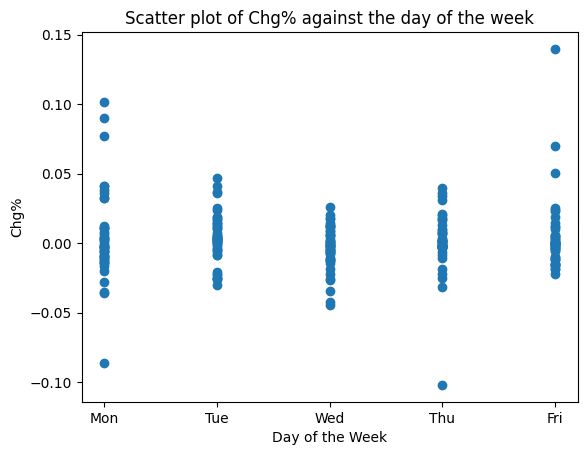

In [ ]:

import pandas as pd
import statistics
import matplotlib.pyplot as plt

excel_file_path = "/content/drive/MyDrive/Lab Session1 Data (1).xlsx"
df = pd.read_excel(excel_file_path, sheet_name='IRCTC Stock Price')

price_mean = statistics.mean(df['Price'])
price_variance = statistics.variance(df['Price'])
print(f"Mean of Price: {price_mean}\n")
print(f"Variance of Price: {price_variance}\n")

wednesday_data = df[df['Day'] == 'Wed']
wednesday_mean = statistics.mean(wednesday_data['Price'])
print(f"Population Mean of Price: {price_mean}\n")
print(f"Sample Mean of Price on Wednesdays: {wednesday_mean}\n")


april_data = df[df['Month'] == 'Apr']
april_mean = statistics.mean(april_data['Price'])
print(f"Population Mean of Price: {price_mean}\n")
print(f"Sample Mean of Price in April: {april_mean}\n")


loss_probability = len(df[df['Chg%'] < 0]) / len(df)
print(f"Probability of making a loss: {loss_probability}\n")
wednesday_profit_probability = len(wednesday_data[wednesday_data['Chg%'] > 0]) / len(wednesday_data)
print(f"Probability of making a profit on Wednesday: {wednesday_profit_probability}\n")
conditional_profit_probability = wednesday_profit_probability / loss_probability
print(f"Conditional Probability of making profit, given today is Wednesday: {conditional_profit_probability}\n")
day=['Mon','Tue','Wed','Thu','Fri']
day1=[]
chg1=[]
for i in day:
    for j in range(2,len(df['Day'])):
        if i==df.loc[j,'Day']:
            day1.append(i)
            chg1.append(df.loc[j,'Chg%'])
plt.scatter(day1, chg1)
plt.xlabel('Day of the Week')
plt.ylabel('Chg%')
plt.title('Scatter plot of Chg% against the day of the week')
plt.show()